In [3]:
#question1
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Drop rows with missing values
penguins = penguins.dropna(subset=["flipper_length_mm"])

# Group the data by species
species_groups = penguins.groupby("species")

# Create histograms for each species and add lines and rectangles
fig = go.Figure()

for species, group in species_groups:
    flipper_lengths = group["flipper_length_mm"]
    
    # Calculate the statistics
    mean = flipper_lengths.mean()
    median = flipper_lengths.median()
    std = flipper_lengths.std()
    min_val = flipper_lengths.min()
    max_val = flipper_lengths.max()
    q1 = flipper_lengths.quantile(0.25)
    q3 = flipper_lengths.quantile(0.75)
    
    # Add histogram for the species
    fig.add_trace(go.Histogram(
        x=flipper_lengths, 
        name=f"{species} - flipper_length_mm",
        opacity=0.75
    ))

    # Add hlines for mean and median
    fig.add_vline(x=mean, line=dict(color='red', dash='dash'), annotation_text=f'{species} Mean', annotation_position='top right')
    fig.add_vline(x=median, line=dict(color='blue', dash='dot'), annotation_text=f'{species} Median', annotation_position='top left')
    
    # Add vrects for range, IQR, and 2*std around mean
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor="green", opacity=0.2, line_width=0)
    fig.add_vrect(x0=q1, x1=q3, fillcolor="yellow", opacity=0.3, line_width=0)
    fig.add_vrect(x0=mean - 2*std, x1=mean + 2*std, fillcolor="purple", opacity=0.2, line_width=0)

# Update layout for the figure
fig.update_layout(
    title="Histograms of Flipper Lengths by Species with Markers for Location and Scale",
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Count",
    barmode='overlay'
)

# Show the figure
fig.show()


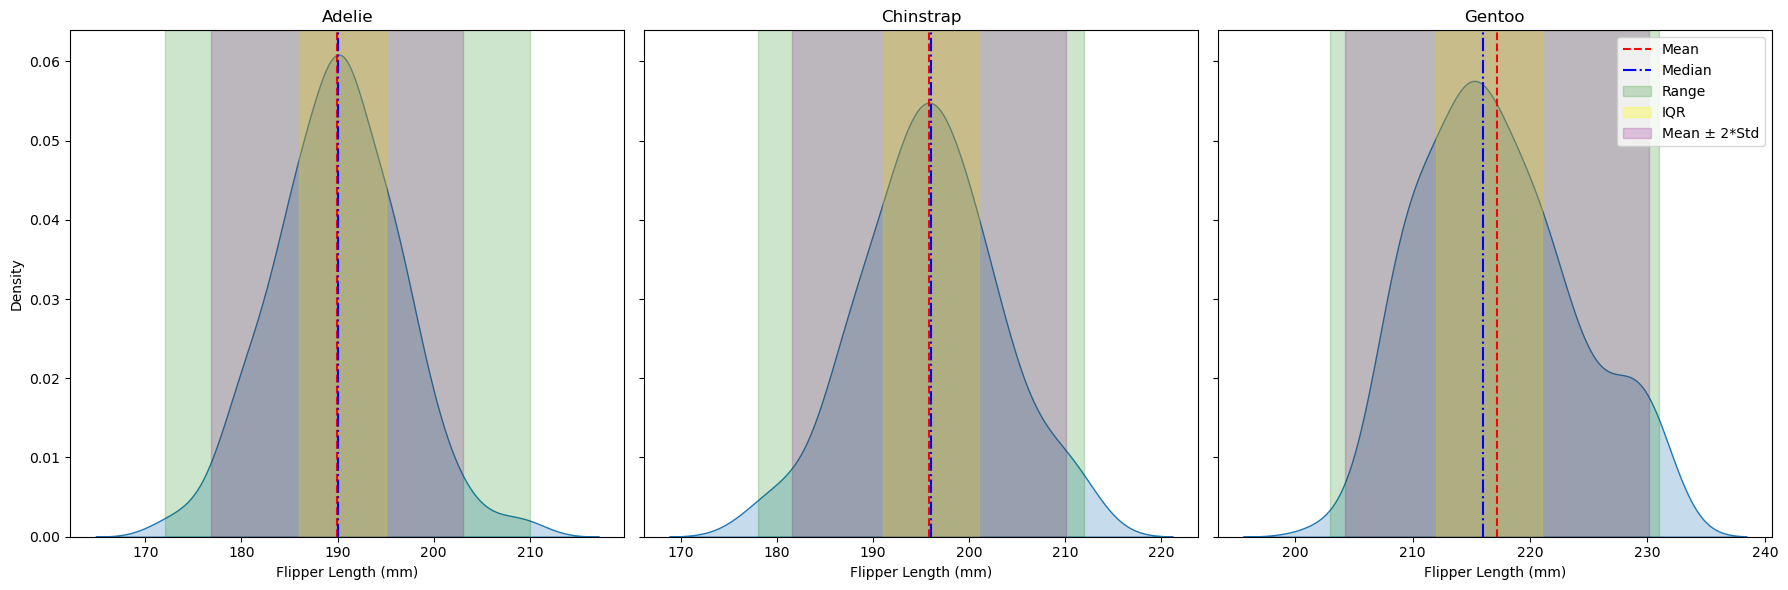

In [4]:
#question2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Drop rows with missing values
penguins = penguins.dropna(subset=["flipper_length_mm"])

# Set up the figure and axes for the row of plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Group the data by species
species_groups = penguins.groupby("species")

# Iterate over the species and axes
for (species, group), ax in zip(species_groups, axes):
    flipper_lengths = group["flipper_length_mm"]
    
    # Calculate statistics
    mean = flipper_lengths.mean()
    median = flipper_lengths.median()
    std = flipper_lengths.std()
    min_val = flipper_lengths.min()
    max_val = flipper_lengths.max()
    q1 = flipper_lengths.quantile(0.25)
    q3 = flipper_lengths.quantile(0.75)
    
    # Plot the KDE
    sns.kdeplot(flipper_lengths, ax=ax, fill=True)
    
    # Add vertical lines for mean and median
    ax.axvline(mean, color='red', linestyle='--', label='Mean')
    ax.axvline(median, color='blue', linestyle='-.', label='Median')
    
    # Add shaded areas for range, IQR, and 2*std from mean
    ax.axvspan(min_val, max_val, color='green', alpha=0.2, label='Range')
    ax.axvspan(q1, q3, color='yellow', alpha=0.3, label='IQR')
    ax.axvspan(mean - 2*std, mean + 2*std, color='purple', alpha=0.2, label='Mean ± 2*Std')
    
    # Set title and labels
    ax.set_title(f"{species}")
    ax.set_xlabel('Flipper Length (mm)')
    ax.set_ylabel('Density')

# Adjust layout and show the plot
plt.tight_layout()
plt.legend()
plt.show()


qeustion3:
    Summary:
    In this session, we explored three different methods for visualizing data distributions: box plots, histograms, and kernel density estimators (KDEs). You shared your understanding of these methods, focusing on their advantages and disadvantages. We then expanded this into a more structured comparison:

Box plots: Good for quick summaries and outlier detection but lack detailed distribution shape.
Histograms: Provide a detailed view of distribution shape but are sensitive to bin size.
KDEs: Offer a smooth, continuous view of the data but are sensitive to bandwidth and can be less intuitive.
We discussed how each method is suited for different purposes, with histograms and KDEs better for detailed shape analysis, while box plots are excellent for comparing multiple datasets. You now have a clear, comprehensive understanding of when and why to use each visualization type.
    Personally,I like histograms the most among box plots, histograms, and kernel density estimation plots. There are several reasons for this preference. Firstly, histograms provide a clear and intuitive visual representation of the distribution of data. They divide the data into intervals or bins and display the frequency or count of data points falling into each bin. This allows me to quickly understand the shape, central tendency, and spread of the data. Secondly, histograms are easy to interpret. I can easily see the most common values or ranges of values in the data. They also help me identify outliers and gaps in the data. Moreover, histograms can be customized to suit different needs. I can adjust the number of bins, bin widths, and axis scales to better analyze the data. Finally, histograms are widely used in various fields and are a common tool for data analysis. They are familiar and accessible, making it easier for me to communicate my findings to others.

qeustion4
    1. Data2 which are a normal distribution with a mean of 5 and variance of 2.25 and Data4 which are a normal distribution with a mean of 6 and variance of 0.25. Their means are relatively close (5 and 6), and both possess relatively low variances.
    2. Data1 which are a uniform distribution with a mean approximately equal to 5 and variance around 8.33 and Data2 which are a normal distribution with a mean of 5 and variance of 2.25. Their means are similar, but Data1 has a significantly larger variance compared to Data2.
    3. Data2 ,which with a mean of 5 and variance of 2.25 and Data3 (bimodal, with a mean approximately equal to 5 and a large variance due to the spread between the two modes). Although their variances are similar, Data3 has two distinct modes (around 2 and 8), resulting in means that are quite different from those of Data2.
    4. Data1 ,with a mean approximately equal to 5 and variance around 8.33 and Data4 , with a mean of 6 and variance of 0.25. Their means and variances are very different. Data1 has a large variance, while Data4 has a much smaller variance and a slightly higher mean.

question5
    Summary:
        In this session, we covered the following topics:

Relationship Between Mean, Median, and Skewness:
We discussed how, in right-skewed distributions, the mean is greater than the median, while in left-skewed distributions, the mean is less than the median. This happens because the mean is sensitive to extreme values in the distribution’s tails.
Code Breakdown for Skewed Distributions:
You shared a Python code snippet that uses scipy.stats.gamma to generate a right-skewed (positively skewed) sample (sample1) from a Gamma distribution. It also calculates the mean and median of the sample.
Another sample (sample2) is created by multiplying Gamma-distributed values by -1, which results in a left-skewed (negatively skewed) distribution.
We discussed the purpose of using plotly.express (px) to create histograms and visualize these distributions, as well as how to calculate and compare the mean and median.
This session provided an understanding of skewness and demonstrated how to generate, visualize, and compute key statistics for skewed data using Python.
    Here are my thoughts:
    For right skewness (tail on the right), the mean is bigger than the median. This is because a few large values pull the mean to the right. The median is not as affected by these big values.
For left skewness (tail on the left), the mean is smaller than the median. This is because a few small values pull the mean to the left. Again, the median is less influenced by these small values.

In [6]:
#extending code
import numpy as np

right_data = [1, 2, 3, 4, 5, 100]
mean_right = sum(right_data) / len(right_data)
median_right = np.median(right_data)
print(f"Right-skewed: Mean = {mean_right}, Median = {median_right}")

left_data = [100, 5, 4, 3, 2, 1]
mean_left = sum(left_data) / len(left_data)
median_left = np.median(left_data)
print(f"Left-skewed: Mean = {mean_left}, Median = {median_left}")

Right-skewed: Mean = 19.166666666666668, Median = 3.5
Left-skewed: Mean = 19.166666666666668, Median = 3.5


In [12]:
#question6
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
df # df.columns

,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,1000,100,0,4.8,300,120.0,13.0,20.0,5.0,25.0,...,31,10.0,4,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,1000,100,1,4.8,250,70.0,8.0,12.0,3.0,15.0,...,30,10.0,4,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,1000,100,2,3.9,370,200.0,23.0,35.0,8.0,42.0,...,29,10.0,4,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,1000,100,3,5.7,450,250.0,28.0,43.0,10.0,52.0,...,30,10.0,4,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,1000,100,4,5.7,400,210.0,23.0,35.0,8.0,42.0,...,30,10.0,4,17.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,3000,130,745,NaN,180,NaN,14.0,NaN,NaN,NaN,...,12,NaN,3,NaN,NaN,4.0,NaN,NaN,NaN,NaN
746,3000,130,746,NaN,190,NaN,18.0,NaN,NaN,NaN,...,6,NaN,3,NaN,NaN,7.0,NaN,NaN,NaN,NaN
747,3000,100,747,NaN,340,NaN,13.0,NaN,NaN,NaN,...,38,NaN,0,NaN,NaN,18.0,NaN,NaN,NaN,NaN
748,3000,100,748,NaN,90,NaN,8.0,NaN,NaN,NaN,...,5,NaN,4,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [15]:
#question7
#I recreate it and make it more simplify to see.
import plotly.express as px

df = px.data.gapminder()

fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
                 color="continent", log_x=True, range_x=[100, 100000], range_y=[25, 90])

fig.show()

In [ ]:
#question8
import plotly.express as px

df = px.data.gapminder()

fig = px.scatter(df, x="percent change", y="rank", size="percent", color="sex",
                 animation_frame="year", animation_group="name", hover_name="name",
                 size_max=50, range_x=[-0.005, 0.005])

fig.show()

qeustion9:
Yes.